# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [2]:
import cv2
import time
import numpy as np
from  matplotlib import pyplot as plt

img_path = 'data/Lenna.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

In [3]:
# 顯示多張圖片
def plot_images_labels(images, labels):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    for i in range(0, len(images)):
        img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        ax = plt.subplot(1, len(images), 1 + i)
        ax.imshow(img)
        title = labels[i]
        ax.set_title(title, fontsize=10)

    plt.show()

## 上下左右翻轉圖片

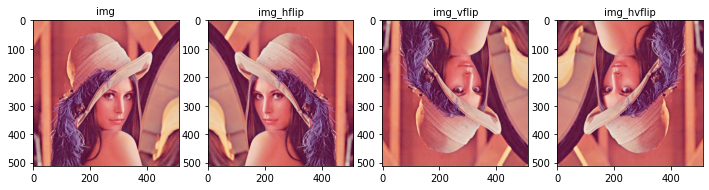

In [4]:
# 水平翻轉 (horizontal)
img_hflip = img[:, ::-1, :]

# 垂直翻轉 (vertical)
img_vflip = img[::-1,:,:]

# 水平 + 垂直翻轉
img_hvflip = img[::-1,::-1,:]

# 組合 + 顯示圖片
plot_images_labels([img, img_hflip, img_vflip, img_hvflip], ['img', 'img_hflip', 'img_vflip', 'img_hvflip'])

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

INTER_NEAREST zoom cost 0.0008141994476318359
INTER_CUBIC zoom cost 0.0027310848236083984


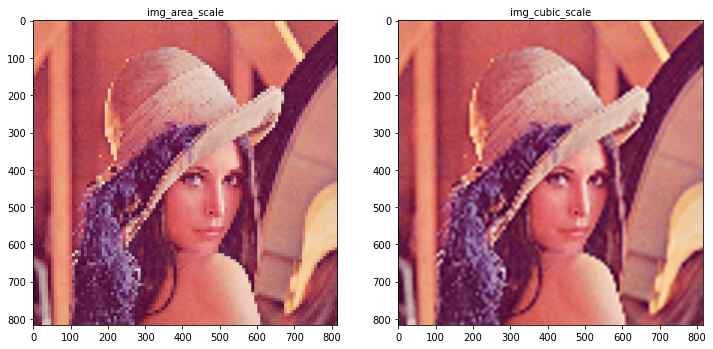

In [5]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
plot_images_labels([img_area_scale, img_cubic_scale], ['img_area_scale', 'img_cubic_scale'])

## 平移幾何轉換

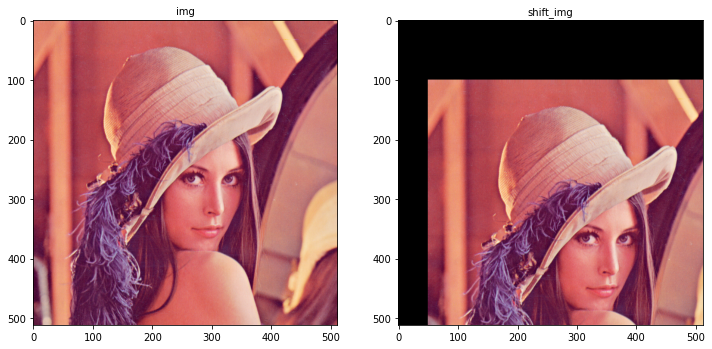

In [6]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([[1, 0, 50], [0, 1, 100]], 
             dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
plot_images_labels([img, shift_img], ['img', 'shift_img'])
img_shift = np.hstack((img, shift_img))